In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:

# -----------------------------
# PARAMETERS
# -----------------------------
DATA_PATH = "data/monthly/*.csv"   # change if needed
DELAY_THRESHOLD = 15

# -----------------------------33
# LOAD + CLEAN MONTHLY FILES
# -----------------------------
def clean_monthly_file(filepath):
    df = pd.read_csv(filepath, low_memory=False)

    # Delay and disruption indicators
    df["DELAYED"] = df["ARR_DELAY"] >= DELAY_THRESHOLD
    df["DISRUPTED"] = (df["DELAYED"]) | (df["CANCELLED"] == 1)

    # Keep only delayed or cancelled flights
    df = df[df["DISRUPTED"]]

    # Keep relevant columns
    df = df[
        [
            "FL_DATE", "MONTH", "DAY_OF_WEEK",
            "OP_CARRIER", "ORIGIN", "DEST",
            "DEP_DELAY", "ARR_DELAY",
            "CANCELLED", "CANCELLATION_CODE",
            "WEATHER_DELAY", "NAS_DELAY",
            "SECURITY_DELAY", "CARRIER_DELAY",
            "LATE_AIRCRAFT_DELAY"
        ]
    ]

    return df


In [6]:
# Read and clean all months
files = glob(DATA_PATH)
monthly_dfs = [clean_monthly_file(f) for f in files]

# Combine all months
full_df = pd.concat(monthly_dfs, ignore_index=True)

print("Total disrupted flights:", full_df.shape[0])

# -----------------------------
# MOST COMMON DEPARTURE AIRPORTS WITH DELAYS
# -----------------------------
top_airports = (
    full_df
    .groupby("ORIGIN")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Departure Airports with Delays/Cancellations:")
print(top_airports)

top_airports.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Departure Airports with Flight Delays or Cancellations")
plt.ylabel("Number of Disrupted Flights")
plt.xlabel("Departure Airport")
plt.tight_layout()
plt.show()

ValueError: No objects to concatenate

In [13]:
from glob import glob

DATA_PATH = "/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/*.csv"
files = glob(DATA_PATH)

print("Monthly files found:", len(files))
print(files)



Monthly files found: 11
['/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/February.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/January.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/June.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/April.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/July.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/March.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/November.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/May.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/December.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/September.csv', '/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/October.csv']


Monthly files found: 11
Total disrupted flights: 1330801

Top 10 Departure Airports with Delays/Cancellations:
ORIGIN
DFW    74956
DEN    65123
ORD    58780
ATL    54751
CLT    49108
LAS    37029
MCO    36243
PHX    33898
LAX    33466
SEA    31683
dtype: int64


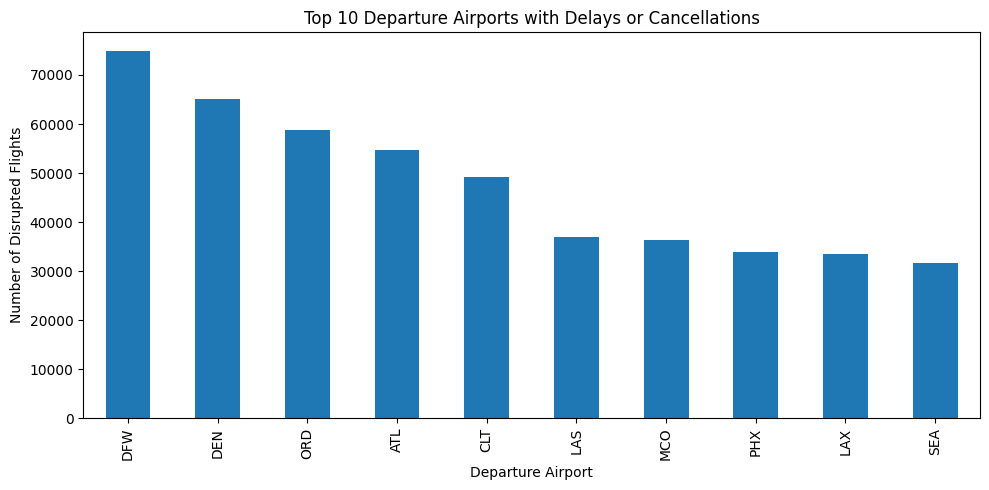


Top 20 Feature Importances:
               Feature  Importance
7381  num__DAY_OF_WEEK    0.218188
7380        num__MONTH    0.186693
7236     cat__DEST_MCO    0.002776
7011   cat__ORIGIN_TPA    0.002518
6888   cat__ORIGIN_MCO    0.002502
6998   cat__ORIGIN_SRQ    0.002133
7271     cat__DEST_ORD    0.002129
7359     cat__DEST_TPA    0.002063
6877   cat__ORIGIN_LGA    0.002027
7122     cat__DEST_DEN    0.002015
7143     cat__DEST_EWR    0.001949
7123     cat__DEST_DFW    0.001893
6775   cat__ORIGIN_DFW    0.001812
7346     cat__DEST_SRQ    0.001765
7225     cat__DEST_LGA    0.001704
7327     cat__DEST_SEA    0.001691
6795   cat__ORIGIN_EWR    0.001609
6923   cat__ORIGIN_ORD    0.001405
7101     cat__DEST_CLT    0.001304
6774   cat__ORIGIN_DEN    0.001272


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --------------------------------------------------
# PARAMETERS
# --------------------------------------------------
DATA_PATH = "/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/*.csv"
DELAY_THRESHOLD = 15

# --------------------------------------------------
# LOAD + CLEAN MONTHLY FILES
# --------------------------------------------------
def clean_monthly_file(filepath):
    df = pd.read_csv(filepath, low_memory=False)

    df["DELAYED"] = df["ARR_DELAY"] >= DELAY_THRESHOLD
    df["DISRUPTED"] = (df["DELAYED"]) | (df["CANCELLED"] == 1)

    df = df[df["DISRUPTED"]]

    df = df[
        [
            "FL_DATE", "MONTH", "DAY_OF_WEEK",
            "OP_CARRIER_FL_NUM", "ORIGIN", "DEST",
            "DEP_DELAY", "ARR_DELAY",
            "CANCELLED", "CANCELLATION_CODE",
            "WEATHER_DELAY", "NAS_DELAY",
            "CARRIER_DELAY", "SECURITY_DELAY",
            "LATE_AIRCRAFT_DELAY", "DELAYED"
        ]
    ]

    return df

# Find files
files = glob(DATA_PATH)
print("Monthly files found:", len(files))

if len(files) == 0:
    raise FileNotFoundError("No CSV files found — check path.")

monthly_dfs = []

for f in files:
    df_clean = clean_monthly_file(f)
    if not df_clean.empty:
        monthly_dfs.append(df_clean)

full_df = pd.concat(monthly_dfs, ignore_index=True)
print("Total disrupted flights:", full_df.shape[0])

# --------------------------------------------------
# MOST COMMON DEPARTURE AIRPORTS
# --------------------------------------------------
top_airports = (
    full_df
    .groupby("ORIGIN")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Departure Airports with Delays/Cancellations:")
print(top_airports)

top_airports.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Departure Airports with Delays or Cancellations")
plt.xlabel("Departure Airport")
plt.ylabel("Number of Disrupted Flights")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# FEATURE IMPORTANCE MODEL
# --------------------------------------------------
X = full_df[["MONTH", "DAY_OF_WEEK", "OP_CARRIER_FL_NUM", "ORIGIN", "DEST"]]
y = full_df["DELAYED"].astype(int)

preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["OP_CARRIER_FL_NUM", "ORIGIN", "DEST"]),
        ("num", "passthrough", ["MONTH", "DAY_OF_WEEK"])
    ]
)

model = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(
    [("prep", preprocessor), ("model", model)]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

feature_names = pipeline.named_steps["prep"].get_feature_names_out()
importances = pipeline.named_steps["model"].feature_importances_

feat_imp = (
    pd.DataFrame({"Feature": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
    .head(20)
)

print("\nTop 20 Feature Importances:")
print(feat_imp)


In [20]:
import pandas as pd
from glob import glob

# --------------------------------------------------
# PARAMETERS
# --------------------------------------------------
DATA_PATH = "/Users/nataliesgarcia/Desktop/dtsc4301/data/AirData/*.csv"
OUTPUT_PATH = "/Users/nataliesgarcia/Desktop/dtsc4301/data/Delayed_Cancelled_Flights.csv"
DELAY_THRESHOLD = 15

# --------------------------------------------------
# CLEANING FUNCTION
# --------------------------------------------------
def clean_monthly_file(filepath):
    df = pd.read_csv(filepath, low_memory=False)

    # Create delay label (DOT standard)
    df["DELAYED"] = df["ARR_DELAY"] >= DELAY_THRESHOLD

    # Create disruption flag
    df["DISRUPTED"] = (df["DELAYED"]) | (df["CANCELLED"] == 1)

    # Keep only delayed or cancelled flights
    df = df[df["DISRUPTED"]]

    # Keep relevant columns (including DELAYED)
    df = df[
        [
            "FL_DATE", "MONTH", "DAY_OF_WEEK",
            "OP_CARRIER_FL_NUM", "ORIGIN", "DEST",
            "DEP_DELAY", "ARR_DELAY",
            "CANCELLED", "CANCELLATION_CODE",
            "WEATHER_DELAY", "NAS_DELAY",
            "CARRIER_DELAY", "SECURITY_DELAY",
            "LATE_AIRCRAFT_DELAY",
            "DELAYED"
        ]
    ]

    return df

# --------------------------------------------------
# LOAD, CLEAN, AND COMBINE ALL MONTHS
# --------------------------------------------------
files = glob(DATA_PATH)
print("Monthly files found:", len(files))

if len(files) == 0:
    raise FileNotFoundError("No CSV files found. Check path.")

monthly_dfs = []

for f in files:
    df_clean = clean_monthly_file(f)
    if not df_clean.empty:
        monthly_dfs.append(df_clean)

if len(monthly_dfs) == 0:
    raise ValueError("No delayed or cancelled flights found.")

# Combine all months into one DataFrame
full_df = pd.concat(monthly_dfs, ignore_index=True)

print("Total delayed or cancelled flights:", full_df.shape[0])

# --------------------------------------------------
# SAVE MASTER CSV
# --------------------------------------------------
full_df.to_csv(OUTPUT_PATH, index=False)

print("Saved cleaned dataset to:")
print(OUTPUT_PATH)


Monthly files found: 11
Total delayed or cancelled flights: 1330801
Saved cleaned dataset to:
/Users/nataliesgarcia/Desktop/dtsc4301/data/Delayed_Cancelled_Flights.csv
